# Friction factor calculations for non-Newtonian fluids

## Import friction_factor.py python file from current directory (for now)

In [1]:
import numpy as np
import scipy.optimize as spo
import matplotlib.pyplot as plt

In [2]:
import rheopy.friction_factor_property as f

In [3]:
diameter = .09738
length = 100.

In [4]:
mdot = 200.0 # kg/min
density = 1000. # kg/m^3
q = mdot/60.0/density
u = q / (3.14159*(diameter/2.0)**2)

## Herschel-Bulkley example

In [5]:
def herschel_bulkley(tauy,k,n,rate):
    return (1.-np.exp(-1000.*np.abs(rate)))*tauy/(rate+1.e-9) + k*(rate+1.e-9)**(n-1.)

tauy = 10.
k = .05
n = .5
viscosity_hb = lambda x: herschel_bulkley(tauy,k,n,x)

In [6]:
b = f.friction_factor(name='HB test',rho=1000.,d=.09738,l=length,viscosity=viscosity_hb)

In [7]:
b.u = .5

In [8]:
print(b)

Name= HB test
Diameter = 0.09738
Length = 100.0
Density = 1000.0
U = 0.5
Pressure drop = 42392.497721397456
Friction factor = 0.08256362856219368
Reynolds number = 193.78993242605523
Wall shear rate = 41.07619634400657
Wall shear stress = 10.320453570274212



In [9]:
b.u = 2.5

/Users/whhiv/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/whhiv/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [10]:
print(b)

Name= HB test
Diameter = 0.09738
Length = 100.0
Density = 1000.0
U = 2.5
Pressure drop = 4401.953570453952
Friction factor = 0.006234328079467934
Reynolds number = 4665.678054844016
Wall shear rate = 102.69049086054632
Wall shear stress = 1.0716555967270147



In [11]:
b.u = 5.

/Users/whhiv/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/whhiv/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [12]:
print(b)

Name= HB test
Diameter = 0.09738
Length = 100.0
Density = 1000.0
U = 5.0
Pressure drop = 4523.870678643893
Friction factor = 0.004037709445367462
Reynolds number = 18159.757102752465
Wall shear rate = 205.38098172109264
Wall shear stress = 1.1013363167158559



In [13]:
b.u = 6.

/Users/whhiv/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/whhiv/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [14]:
print(b)

Name= HB test
Diameter = 0.09738
Length = 100.0
Density = 1000.0
U = 6.0
Pressure drop = 4563.59980743555
Friction factor = 0.003641284847325139
Reynolds number = 25922.39689347915
Wall shear rate = 246.45717806531115
Wall shear stress = 1.1110083731201847



In [15]:
b.u = 8.
tauw = diameter/4.*b.pressure_drop/length
gammadot_f = spo.brentq(lambda x: x-tauw/viscosity_hb(x),0.,1.e+6)
gammadot_f

/Users/whhiv/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/whhiv/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


0.00011964471122562681

In [16]:
print(b)

Name= HB test
Diameter = 0.09738
Length = 100.0
Density = 1000.0
U = 8.0
Pressure drop = 4634.1401856945395
Friction factor = 0.0031178216962012115
Reynolds number = 45382.771529359496
Wall shear rate = 328.60957075374824
Wall shear stress = 1.1281814282073357



In [17]:
b.u = 1.
b.pressure_drop

42937.72760492569

In [18]:
print(b)

Name= HB test
Diameter = 0.09738
Length = 100.0
Density = 1000.0
U = 1.0
Pressure drop = 42937.72760492569
Friction factor = 0.020906379570811
Reynolds number = 765.3166319776343
Wall shear rate = 82.15239268843706
Wall shear stress = 10.453189785419159



In [19]:
b.pressure_drop = 227229.

/Users/whhiv/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/whhiv/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [20]:
print(b)

Name= HB test
Diameter = 0.09738
Length = 100.0
Density = 1000.0
U = 11.988688545390763
Pressure drop = 227229.0
Friction factor = 0.000769768572662108
Reynolds number = 17337505.98725736
Wall shear rate = 821521.0806967575
Wall shear stress = 55.318900049999996



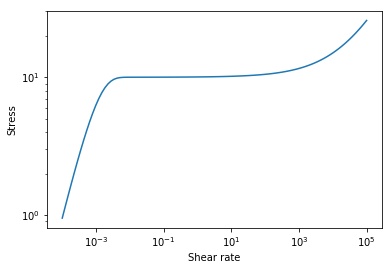

In [21]:
rate = np.logspace(-4,5,101)
stress_list = rate*viscosity_hb(rate)
plt.loglog(rate,stress_list,'-')
plt.xlabel('Shear rate')
plt.ylabel('Stress');

In [22]:
dp_crit = tauy * b.l *4. / b.d
dp_crit

41076.19634421853

/Users/whhiv/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/whhiv/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


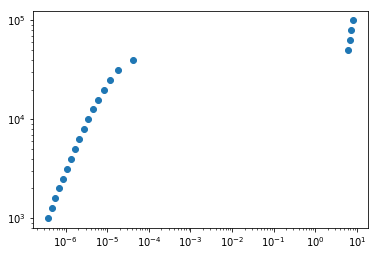

In [23]:
pressure_drop_list = np.logspace(3,5,21)

u_list = []
for p in pressure_drop_list:
    b.pressure_drop = p
    u_list.append(b.u)
    
plt.loglog(u_list, pressure_drop_list,'o')

/Users/whhiv/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/whhiv/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


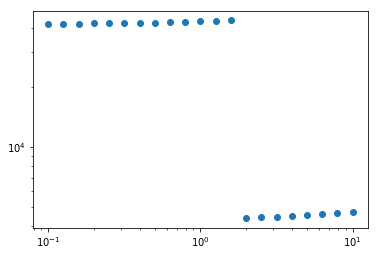

In [24]:
u_list = np.logspace(-1,1.,21)

pressure_drop_list = []
for u in u_list:
    b.u = u
    pressure_drop_list.append(b.pressure_drop)
    
plt.loglog(u_list, pressure_drop_list,'o')

In [25]:
b.pressure_drop = 50000.

/Users/whhiv/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/whhiv/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [26]:
print(b)

Name= HB test
Diameter = 0.09738
Length = 100.0
Density = 1000.0
U = 6.191348389706138
Pressure drop = 50000.0
Friction factor = 0.0006350958774200026
Reynolds number = 93509.29682688294
Wall shear rate = 1887.902500010204
Wall shear stress = 12.1725



In [35]:
m = b.u*3.14159*(b.d/2.)**2*b.rho*60
m

TypeError: rho() missing 1 required positional argument: 'rho'

In [28]:
b.pressure_drop = 45000.

/Users/whhiv/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/whhiv/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [29]:
print(b)

Name= HB test
Diameter = 0.09738
Length = 100.0
Density = 1000.0
U = 5.017468641289472
Pressure drop = 45000.0
Friction factor = 0.0008703279976192661
Reynolds number = 16278.943974098496
Wall shear rate = 365.0010250219366
Wall shear stress = 10.95525



In [30]:
p = 45000.
tauw_calc = b.d/4.*p/b.l
spo.brentq(lambda x: x-tauw_calc/viscosity_hb(x),0.,1.e+9)

365.0010250219366

In [31]:
b.tauw

10.95525

In [32]:
tauw_calc

10.95525

In [33]:
b.gammadotw

365.0010250219366

In [37]:
b.rho

TypeError: rho() missing 1 required positional argument: 'rho'